In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/Physical_Fatigue/Physical_fatigue.csv')
data.head()

#Gender (0=F 1=M)

,eda_scl_usiemens,pulse_rate_bpm,temperature_celsius,Age,Gender (0=F 1=M),fitness level(years training),sleeping hours(hours),Borg_Test
0,5.54,60.0,29.70,26,0,6.0,8.0,6.0
1,5.28,60.0,29.03,26,0,6.0,8.0,6.0
2,2.71,60.0,31.39,22,0,3.5,7.0,6.0
3,1.88,60.0,25.80,26,1,1.0,4.0,6.0
4,0.05,60.0,24.73,31,1,14.0,5.0,6.0


In [ ]:
subdata = data.drop(['Age','Gender (0=F 1=M)','fitness level(years training)','sleeping hours(hours)'], axis=1)
subdata.head()

,eda_scl_usiemens,pulse_rate_bpm,temperature_celsius,Borg_Test
0,5.54,60.0,29.70,6.0
1,5.28,60.0,29.03,6.0
2,2.71,60.0,31.39,6.0
3,1.88,60.0,25.80,6.0
4,0.05,60.0,24.73,6.0


In [ ]:
subdata = subdata.rename(columns={'eda_scl_usiemens': 'EDA (μs)', 'pulse_rate_bpm': 'Pulse Rate (bpm)', 'temperature_celsius': 'Skin Temperature (ºC)'})
subdata.head()

,EDA (μs),Pulse Rate (bpm),Skin Temperature (ºC),Borg_Test
0,5.54,60.0,29.70,6.0
1,5.28,60.0,29.03,6.0
2,2.71,60.0,31.39,6.0
3,1.88,60.0,25.80,6.0
4,0.05,60.0,24.73,6.0


In [ ]:
subdata = subdata.dropna()
subdata.head()

,EDA (μs),Pulse Rate (bpm),Skin Temperature (ºC),Borg_Test
0,5.54,60.0,29.70,6.0
1,5.28,60.0,29.03,6.0
2,2.71,60.0,31.39,6.0
3,1.88,60.0,25.80,6.0
4,0.05,60.0,24.73,6.0


In [ ]:
def biclass(borg):
  if (borg>=6) & (borg<=12):
    return 0 # low
  elif (borg>=13) & (borg<=20):
    return 1 # high

def threeclass(borg):
  if (borg>=6) & (borg<=12):
    return 0 # low
  elif (borg>=13) & (borg<=16):
    return 1 # moderate
  elif (borg>=17) & (borg<=20):
    return 2 # high

def fourclass(borg):
  if (borg>=6) & (borg<=10):
    return 0 # low
  elif (borg>=11) & (borg<=14):
    return 1 # moderate
  elif (borg>=15) & (borg<=17):
    return 2 # high
  elif (borg>=18) & (borg<=20):
    return 3 # very high

def fiveclass(borg):
  if (borg>=6) & (borg<=8):
    return 0 # low-fatigated
  if (borg>=9) & (borg<=11):
    return 1 # low-moderate
  elif (borg>=12) & (borg<=14):
    return 2 # moderate
  elif (borg>=15) & (borg<=17):
    return 3 # high
  elif (borg>=18) & (borg<=20):
    return 4 # very high

In [ ]:
subdata['Two Levels'] = subdata['Borg_Test'].apply(biclass)
subdata['Three Levels'] = subdata['Borg_Test'].apply(threeclass)
subdata['Four Levels'] = subdata['Borg_Test'].apply(fourclass)
subdata['Five Levels'] = subdata['Borg_Test'].apply(fiveclass)

subdata.head()

,EDA (μs),Pulse Rate (bpm),Skin Temperature (ºC),Borg_Test,Two Levels,Three Levels,Four Levels,Five Levels
0,5.54,60.0,29.70,6.0,0,0,0,0
1,5.28,60.0,29.03,6.0,0,0,0,0
2,2.71,60.0,31.39,6.0,0,0,0,0
3,1.88,60.0,25.80,6.0,0,0,0,0
4,0.05,60.0,24.73,6.0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['EDA (μs)', 'Pulse Rate (bpm)', 'Skin Temperature (ºC)']
scaler = StandardScaler()

subdata[columns_to_normalize] = scaler.fit_transform(subdata[columns_to_normalize])

subdata.head()

,EDA (μs),Pulse Rate (bpm),Skin Temperature (ºC),Borg_Test,Two Levels,Three Levels,Four Levels,Five Levels
0,0.763249,-2.353515,0.226182,6.0,0,0,0,0
1,0.688543,-2.353515,-0.079729,6.0,0,0,0,0
2,-0.049892,-2.353515,0.997807,6.0,0,0,0,0
3,-0.288375,-2.353515,-1.554492,6.0,0,0,0,0
4,-0.814187,-2.353515,-2.043036,6.0,0,0,0,0


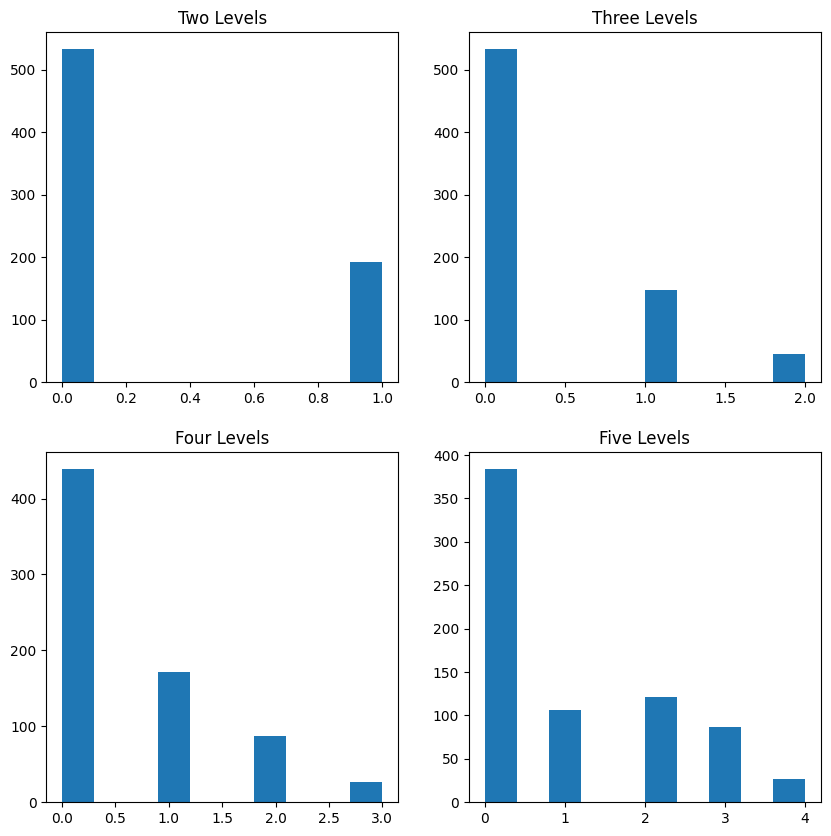

In [ ]:
classifications = ['Two Levels','Three Levels','Four Levels','Five Levels']
pl.figure(figsize=(10,10))
for i in range(4):
  pl.subplot(2,2,i+1)
  pl.hist(subdata[classifications[i]])
  pl.title(classifications[i])
pl.show()

# Two Levels

## K-Means

   EDA (μs)  Pulse Rate (bpm)  Skin Temperature (ºC)
0  0.763249         -2.353515               0.226182
1  0.688543         -2.353515              -0.079729
2 -0.049892         -2.353515               0.997807
3 -0.288375         -2.353515              -1.554492
4 -0.814187         -2.353515              -2.043036


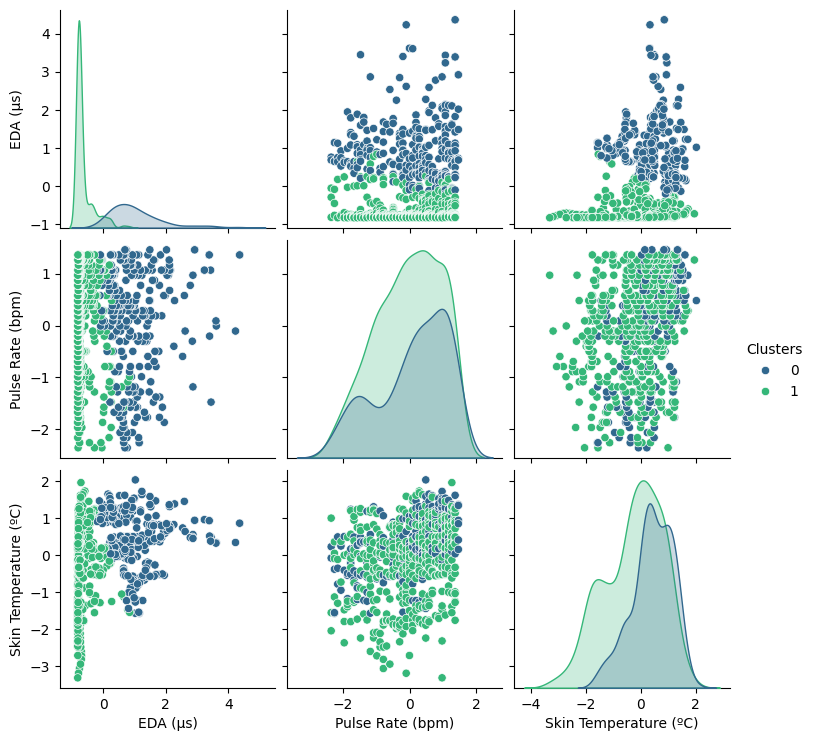

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

rm = ['Borg_Test', 'Two Levels', 'Three Levels', 'Four Levels', 'Five Levels']
kmeans.fit(subdata.drop(rm, axis=1))
print(subdata.drop(rm, axis=1).head())

labels = kmeans.labels_

subdata['Clusters'] = labels

rm = ['Borg_Test','Two Levels','Three Levels','Four Levels','Five Levels']
sns.pairplot(subdata.drop(rm, axis=1), hue='Clusters', palette='viridis')

## Borg Test

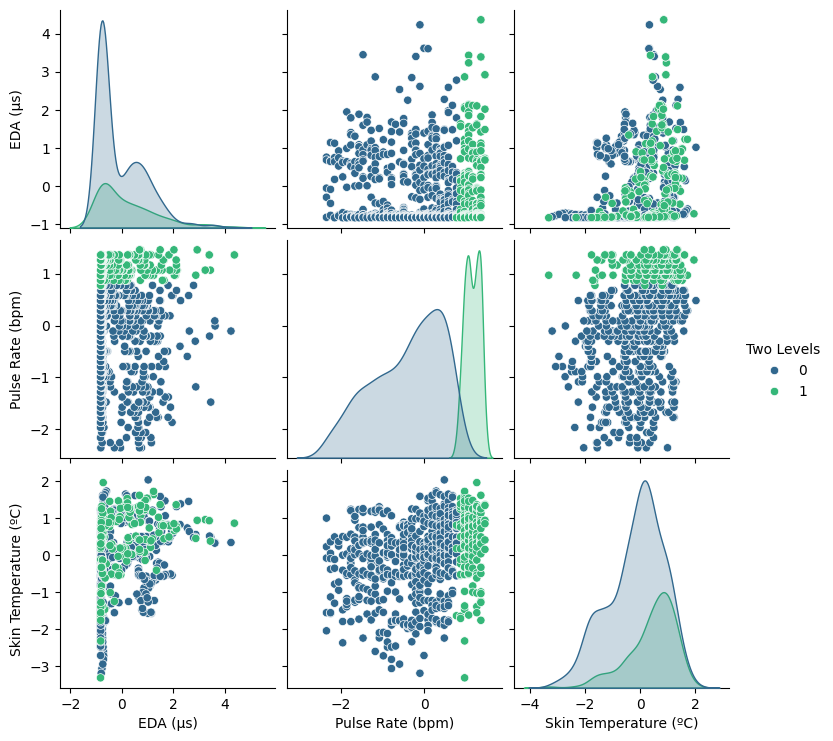

In [ ]:
rm = ['Borg_Test','Three Levels','Four Levels','Five Levels','Clusters']
sns.pairplot(subdata.drop(rm, axis=1), hue='Two Levels', palette='viridis')

In [ ]:
data_columns = ['EDA (μs)', 'Pulse Rate (bpm)', 'Skin Temperature (ºC)','Clusters','Two Levels']

print(subdata[data_columns].groupby('Clusters').mean())
print(subdata[data_columns].groupby('Two Levels').mean())

          EDA (μs)  Pulse Rate (bpm)  Skin Temperature (ºC)  Two Levels
Clusters                                                               
0         1.033801          0.082283               0.417488    0.322581
1        -0.646705         -0.051473              -0.261164    0.228700
            EDA (μs)  Pulse Rate (bpm)  Skin Temperature (ºC)  Clusters
Two Levels                                                             
0          -0.070582         -0.414944               -0.15190  0.645403
1           0.195939          1.151901                0.42168  0.531250


The pairplot shows how different physiological measurements (EDA, Pulse Rate, Skin Temperature) are distributed across these two fatigue levels:

EDA (Electrodermal Activity): Lower EDA values seem to correspond to lower fatigue, while higher EDA values are associated with higher fatigue.
Pulse Rate (bpm): Lower pulse rates correspond to low fatigue, while higher pulse rates are associated with high fatigue.
Skin Temperature (°C): There seems to be some overlap, but in general, higher skin temperatures are associated with higher fatigue levels.

# Three Levels

## K-Means

   EDA (μs)  Pulse Rate (bpm)  Skin Temperature (ºC)
0  0.763249         -2.353515               0.226182
1  0.688543         -2.353515              -0.079729
2 -0.049892         -2.353515               0.997807
3 -0.288375         -2.353515              -1.554492
4 -0.814187         -2.353515              -2.043036


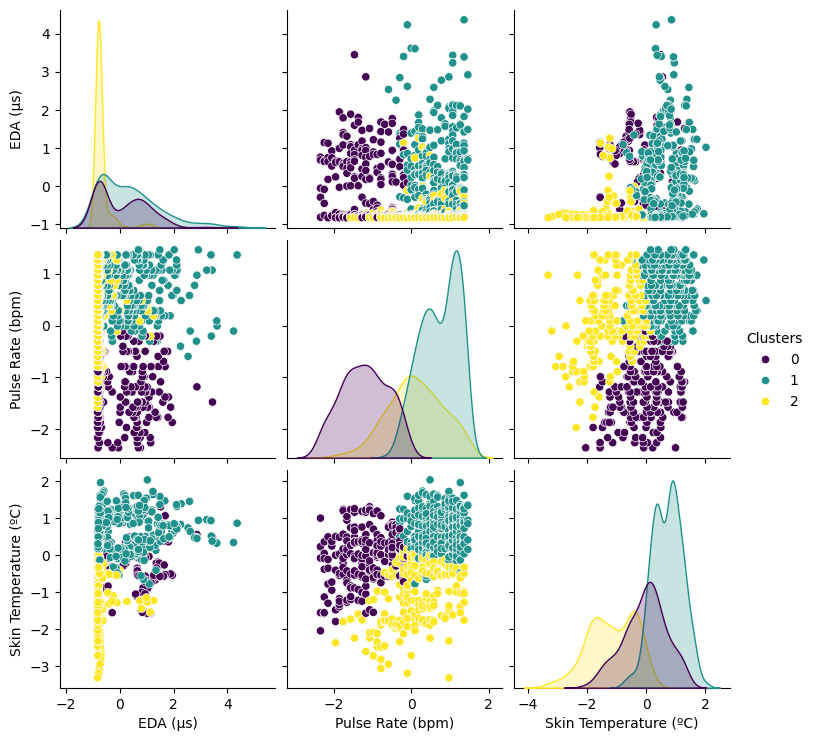

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

rm = ['Borg_Test', 'Two Levels', 'Three Levels', 'Four Levels', 'Five Levels','Clusters']
kmeans.fit(subdata.drop(rm, axis=1))

print(subdata.drop(rm, axis=1).head())

labels = kmeans.labels_

subdata['Clusters'] = labels

rm = ['Borg_Test','Two Levels','Three Levels','Four Levels','Five Levels']
sns.pairplot(subdata.drop(rm, axis=1), hue='Clusters', palette='viridis')

## Borg Test

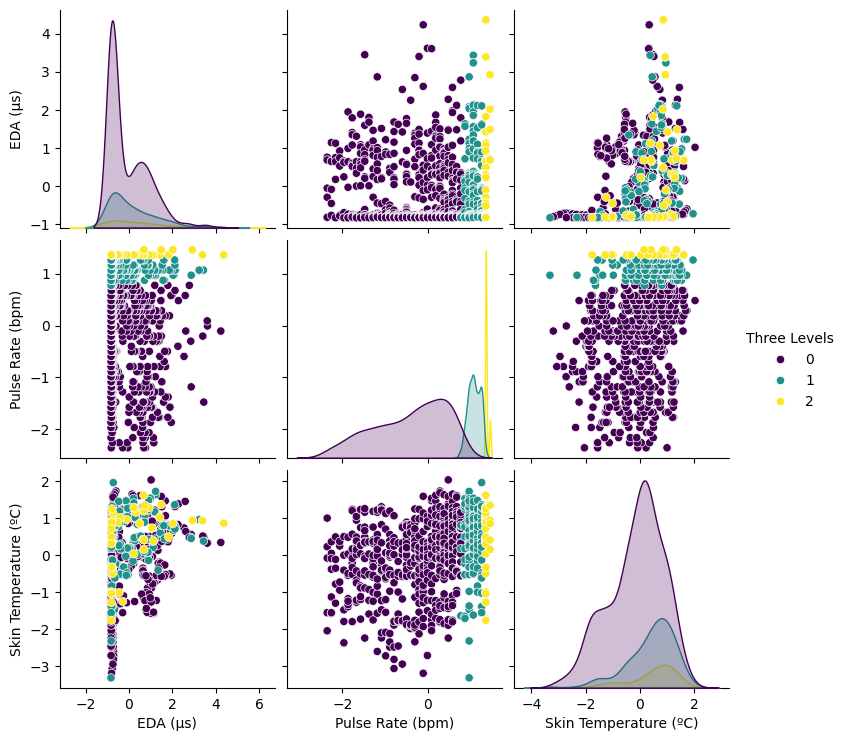

In [ ]:
rm = ['Borg_Test','Two Levels','Four Levels','Five Levels','Clusters']
sns.pairplot(subdata.drop(rm, axis=1), hue='Three Levels', palette='viridis')

In [ ]:
data_columns = ['EDA (μs)', 'Pulse Rate (bpm)', 'Skin Temperature (ºC)','Clusters','Three Levels']

print(subdata[data_columns].groupby('Clusters').mean())
print(subdata[data_columns].groupby('Three Levels').mean())

          EDA (μs)  Pulse Rate (bpm)  Skin Temperature (ºC)  Three Levels
Clusters                                                                 
0         0.088301         -1.212598              -0.040646      0.000000
1         0.349247          0.722446               0.712795      0.592593
2        -0.685473          0.100836              -1.158597      0.234375
              EDA (μs)  Pulse Rate (bpm)  Skin Temperature (ºC)  Clusters
Three Levels                                                             
0            -0.070582         -0.414944              -0.151900  0.900563
1             0.137810          1.083520               0.404218  1.183673
2             0.385826          1.375280               0.478723  1.200000


# Four Levels

## K-Means

   EDA (μs)  Pulse Rate (bpm)  Skin Temperature (ºC)
0  0.763249         -2.353515               0.226182
1  0.688543         -2.353515              -0.079729
2 -0.049892         -2.353515               0.997807
3 -0.288375         -2.353515              -1.554492
4 -0.814187         -2.353515              -2.043036


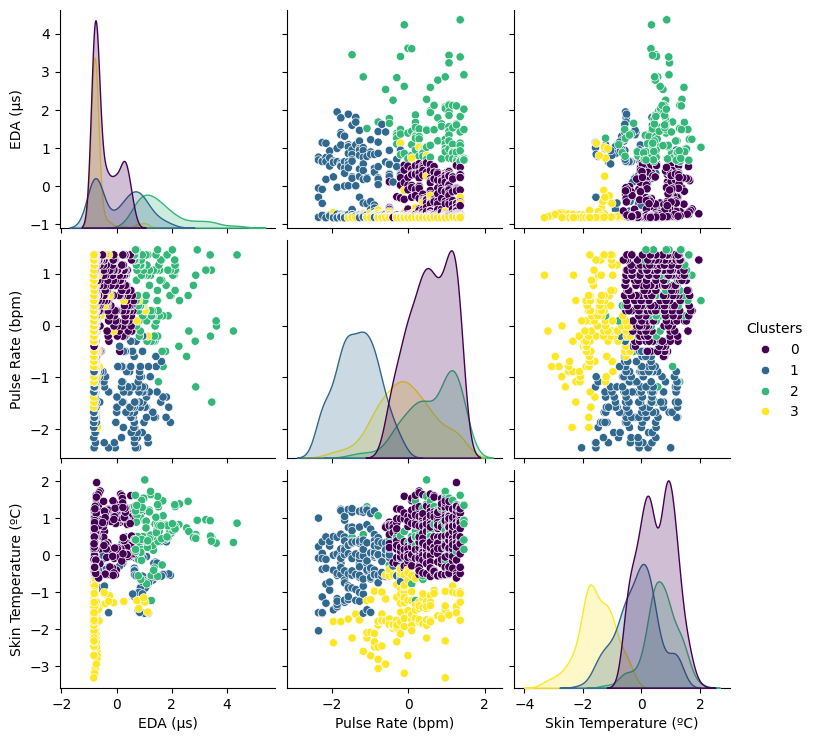

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

rm = ['Borg_Test', 'Two Levels', 'Three Levels', 'Four Levels', 'Five Levels','Clusters']
kmeans.fit(subdata.drop(rm, axis=1))

print(subdata.drop(rm, axis=1).head())

labels = kmeans.labels_

subdata['Clusters'] = labels

rm = ['Borg_Test','Two Levels','Three Levels','Four Levels','Five Levels']
sns.pairplot(subdata.drop(rm, axis=1), hue='Clusters', palette='viridis')

## Borg Test

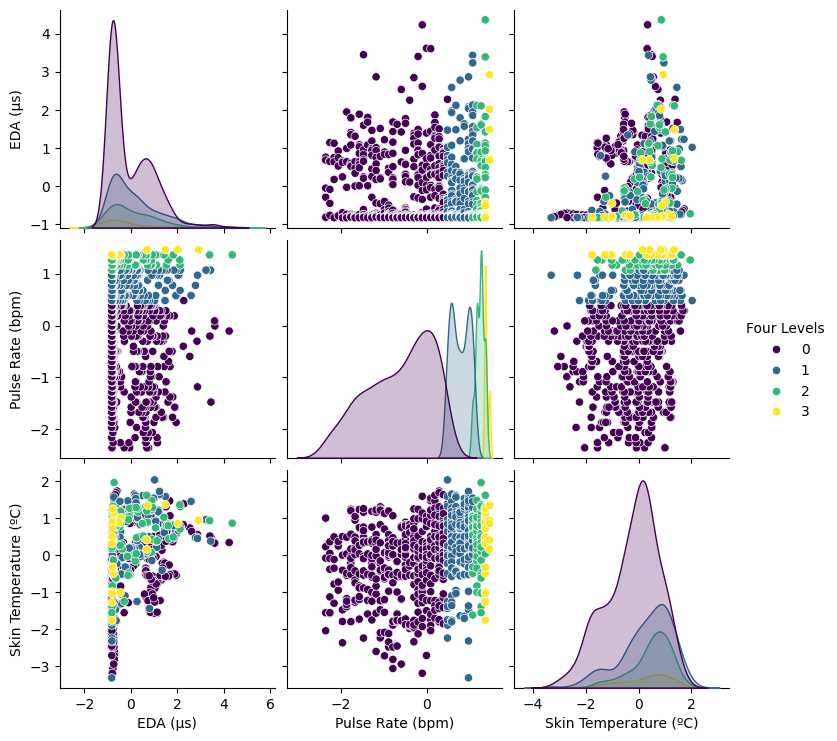

In [ ]:
rm = ['Borg_Test','Two Levels','Three Levels','Five Levels','Clusters']
sns.pairplot(subdata.drop(rm, axis=1), hue='Four Levels', palette='viridis')

In [ ]:
data_columns = ['EDA (μs)', 'Pulse Rate (bpm)', 'Skin Temperature (ºC)','Clusters','Four Levels']

print(subdata[data_columns].groupby('Clusters').mean())
print(subdata[data_columns].groupby('Four Levels').mean())

          EDA (μs)  Pulse Rate (bpm)  Skin Temperature (ºC)  Four Levels
Clusters                                                                
0        -0.401320          0.575950               0.502267     0.881356
1         0.087328         -1.338157              -0.124871     0.000000
2         1.629641          0.629576               0.662371     0.958333
3        -0.696425         -0.064666              -1.545498     0.390977
             EDA (μs)  Pulse Rate (bpm)  Skin Temperature (ºC)  Clusters
Four Levels                                                             
0           -0.067138         -0.634069              -0.234468  1.277904
1            0.113869          0.775994               0.304119  0.889535
2            0.152427          1.235393               0.497088  0.839080
3           -0.124917          1.385415               0.273193  1.074074


# Five Levels

## K-Means

   EDA (μs)  Pulse Rate (bpm)  Skin Temperature (ºC)
0  0.763249         -2.353515               0.226182
1  0.688543         -2.353515              -0.079729
2 -0.049892         -2.353515               0.997807
3 -0.288375         -2.353515              -1.554492
4 -0.814187         -2.353515              -2.043036


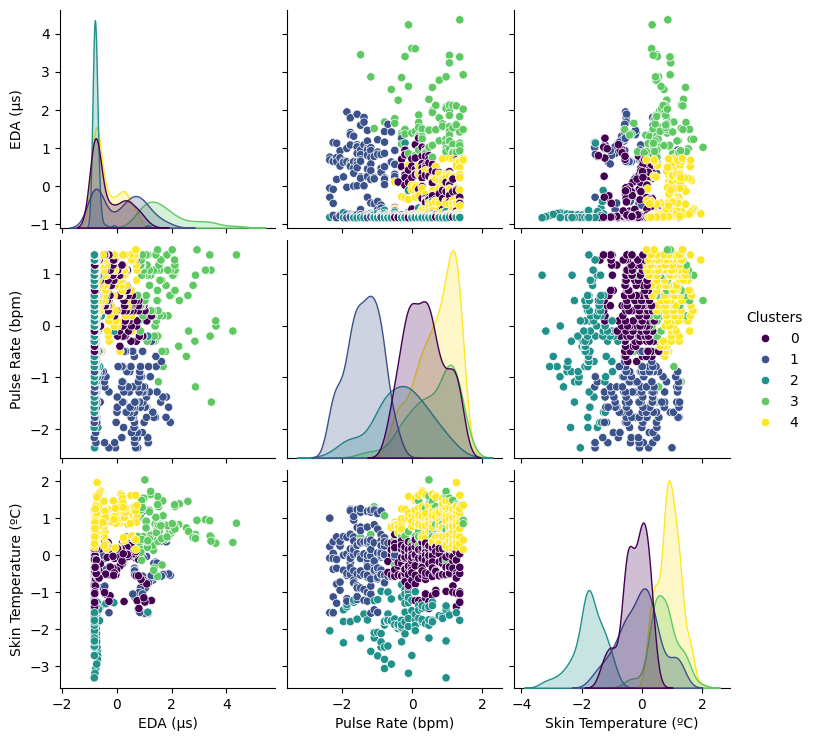

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

rm = ['Borg_Test', 'Two Levels', 'Three Levels', 'Four Levels', 'Five Levels','Clusters']
kmeans.fit(subdata.drop(rm, axis=1))

print(subdata.drop(rm, axis=1).head())

labels = kmeans.labels_

subdata['Clusters'] = labels

rm = ['Borg_Test','Two Levels','Three Levels','Four Levels','Five Levels']
sns.pairplot(subdata.drop(rm, axis=1), hue='Clusters', palette='viridis')

## Borg Test

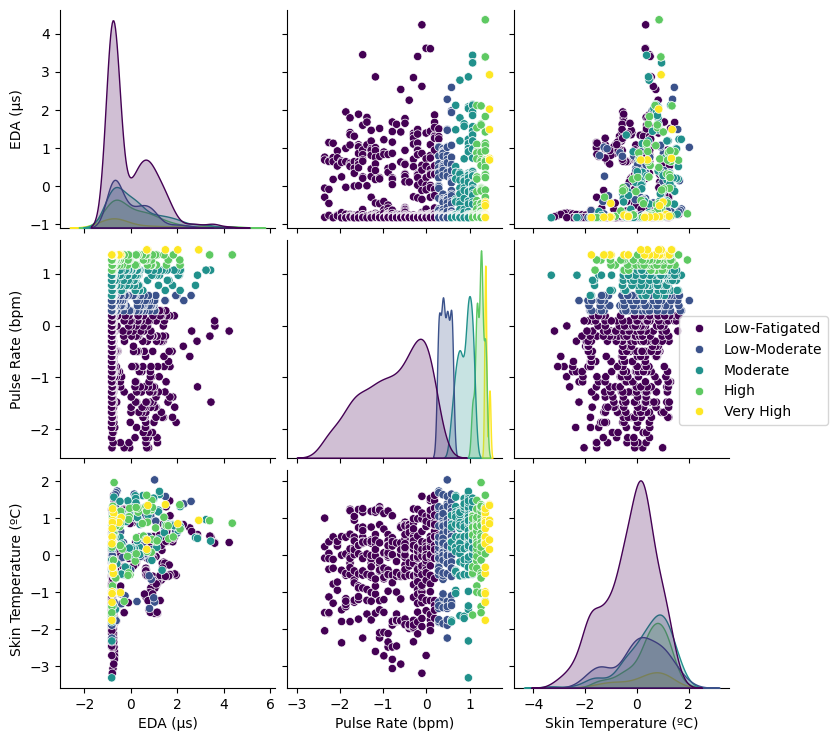

In [ ]:
rm = ['Borg_Test','Two Levels','Three Levels','Four Levels','Clusters']
g = sns.pairplot(subdata.drop(rm, axis=1), hue='Five Levels', palette='viridis')
handles = g._legend_data.values()
labels = ['Low-Fatigated', 'Low-Moderate', 'Moderate', 'High', 'Very High'] # Replace with your desired labels
g.fig.legend(handles=handles, labels=labels, loc='center right', ncol=1)
g._legend.remove()

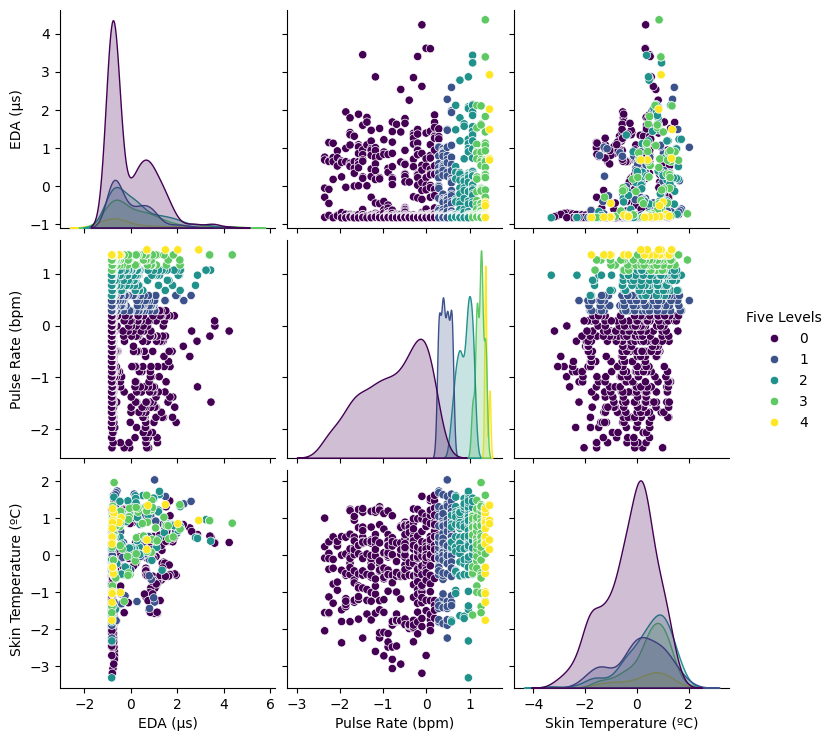

In [ ]:
rm = ['Borg_Test','Two Levels','Three Levels','Four Levels','Clusters']
sns.pairplot(subdata.drop(rm, axis=1), hue='Five Levels', palette='viridis')

In [ ]:
data_columns = ['EDA (μs)', 'Pulse Rate (bpm)', 'Skin Temperature (ºC)','Clusters','Five Levels']

print(subdata[data_columns].groupby('Clusters').mean())
print(subdata[data_columns].groupby('Five Levels').mean())

          EDA (μs)  Pulse Rate (bpm)  Skin Temperature (ºC)  Five Levels
Clusters                                                                
0        -0.325338          0.352450              -0.251450     1.056497
1         0.137884         -1.385473              -0.070253     0.000000
2        -0.761948         -0.320811              -1.758998     0.409524
3         1.795909          0.601724               0.734496     1.490000
4        -0.347418          0.714236               0.907185     1.836957
             EDA (μs)  Pulse Rate (bpm)  Skin Temperature (ºC)  Clusters
Five Levels                                                             
0           -0.057958         -0.773355              -0.279769  1.476562
1           -0.066536          0.431680               0.081367  1.801887
2            0.160499          0.878717               0.398212  2.652893
3            0.152427          1.235393               0.497088  2.896552
4           -0.124917          1.385415            

Level 0 (Purple):

EDA (µS): Low values, indicating low fatigue.
Pulse Rate (bpm): Lower pulse rates (60-80 bpm).
Skin Temperature (°C): Lower skin temperatures.
Level 1 (Blue):

EDA (µS): Slightly higher than Level 0.
Pulse Rate (bpm): Moderate pulse rates.
Skin Temperature (°C): Slightly higher than Level 0.
Level 2 (Teal):

EDA (µS): Moderate values.
Pulse Rate (bpm): Moderate to high pulse rates.
Skin Temperature (°C): Moderate temperatures.
Level 3 (Green):

EDA (µS): Higher values.
Pulse Rate (bpm): Higher pulse rates (above 80 bpm).
Skin Temperature (°C): Higher skin temperatures.
Level 4 (Yellow):

EDA (µS): The highest EDA values.
Pulse Rate (bpm): The highest pulse rates (near 100 bpm).
Skin Temperature (°C): The highest skin temperatures.

These results suggest a clear progression from low to very high levels of physical fatigue as indicated by the increasing Borg scale values. The clustering aligns well with the physiological data, confirming that the Borg scale is effectively capturing the intensity of physical exertion.  even if distinct clusters are not clearly differentiated, there may still be a tendency or pattern within the data that suggests groupings. In clustering analysis, not all datasets will have well-separated clusters, but that does not mean that clustering is ineffective. Instead, the data might show a gradient or tendency toward certain groupings rather than distinct, isolated clusters.